# 2. Análisis exploratorio

<h2> Importamos librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 ## Attribute Information

* **Age**: age of the patient [years]

* **Sex**: sex of the patient [M: Male, F: Female]

* **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

* **RestingBP**: resting blood pressure [mm Hg]

* **Cholesterol**: serum cholesterol [mm/dl]

* **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

* **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

* **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]

* **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]

* **Oldpeak**: oldpeak = ST [Numeric value measured in depression], ejercicio relativo al descanso (oldpeak). Intervalo de tiempo entre latido y latido.


* **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]. La pendiente que sigue el electrocadiograma después de un latido, debe ser plano para considerarse normal.

* **HeartDisease**: output class [1: heart disease, 0: Normal]

* **Link**: [DataSet de Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

<h2> Cargamos datasets:

In [2]:
df = pd.read_csv("heart.csv")
df_limpio = pd.read_csv("Heart_limpio.csv")
df_str = pd.read_csv("Heart_std.csv")

In [3]:
df_limpio

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1.0,3.0,140.0,289.0,0.0,1.0,172.0,0.0,0.0,2.0,0.0
1,49.0,0.0,1.0,160.0,180.0,0.0,1.0,156.0,0.0,1.0,1.0,1.0
2,37.0,1.0,3.0,130.0,283.0,0.0,2.0,98.0,0.0,0.0,2.0,0.0
3,48.0,0.0,2.0,138.0,214.0,0.0,1.0,108.0,1.0,1.5,1.0,1.0
4,54.0,1.0,1.0,150.0,195.0,0.0,1.0,122.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1.0,4.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,1.0
914,68.0,1.0,2.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,1.0
915,57.0,1.0,2.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0
916,57.0,0.0,3.0,130.0,236.0,0.0,3.0,174.0,0.0,0.0,1.0,1.0


In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Comprobamos que nuestros registros están descompensados:

### Hay mas hombres que mujeres en nuestro dataset:

In [5]:
mask = df["Sex"] == "M"
print("Nº Hombre:",len(df[mask]))

Nº Hombre: 725


In [6]:
mask = df["Sex"] == "F"
print("Nº Mujeres:",len(df[mask]))

Nº Mujeres: 193


In [7]:
mujeres = len(df[df["Sex"] == "F"])
hombres = len(df[df["Sex"] == "M"])

print("Mujeres + Hombre:",mujeres + hombres)
print("Registros totales:",len(df. index))

Mujeres + Hombre: 918
Registros totales: 918


C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


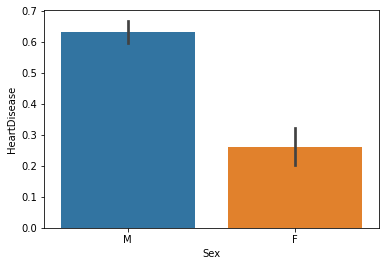

In [8]:
sns.barplot(df["Sex"],df["HeartDisease"]);

### En nuestra gráfica se muestra que los hombres tienden a tener más enfermedades cardiovasculares que las mujeres. Esto podría ser cierto, pero como hay muy pocos registros de mujeres en nuestro dataset, no lo vamos a tener en cuenta, ya que podría afectar negativamente a nuestro modelo de ML.

# Vemos si nuestra variable target está balanceada en cuanto a registros:

In [9]:
mask = df["HeartDisease"] == 1
print("Nº de personas con enfermedad cardíaca:", len(df[mask]))

Nº de personas con enfermedad cardíaca: 508


In [10]:
mask = df["HeartDisease"] == 0
print("Nº de personas sin enfermedad cardíaca:", len(df[mask]))

Nº de personas sin enfermedad cardíaca: 410


# Las edades están bien distribuidas:

### La edades van de los 28 a los 77 años, habiendo registros en todos sus intervalos:

In [11]:
np.array(sorted(df["Age"].unique()))

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
      dtype=int64)

### El rango de edad que comprende más personas con enfermedades cardiovasculares se encuentra entre los 58 y 62 años.

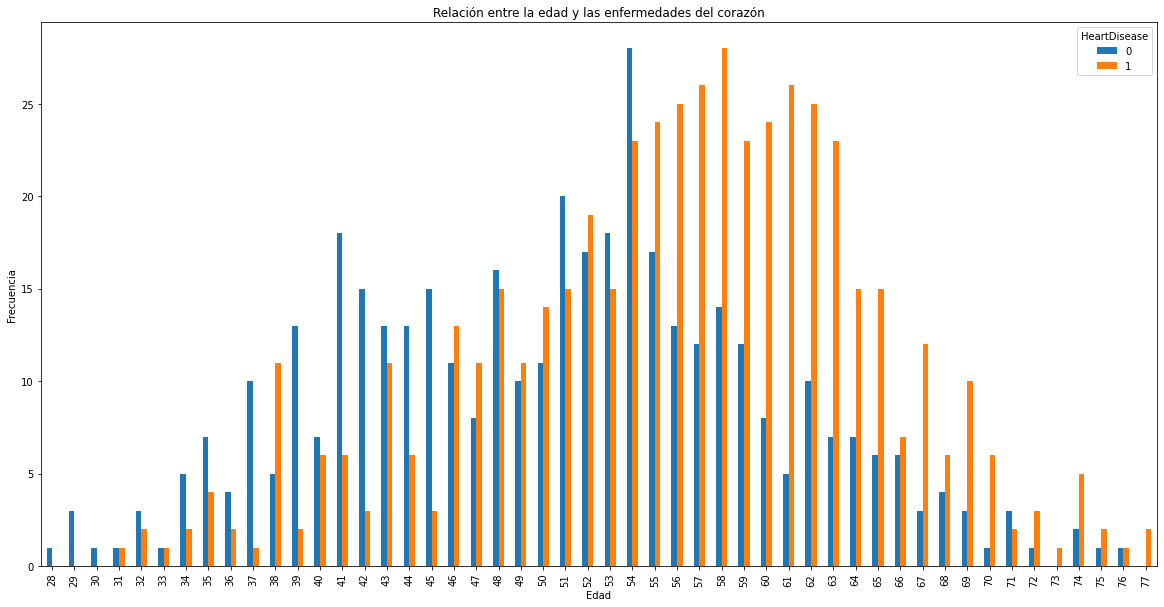

In [12]:
pd.crosstab(df.Age,df.HeartDisease).plot(kind = "bar", figsize=(20,10))
plt.title('Relación entre la edad y las enfermedades del corazón')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Correlaciones relevantes:


<AxesSubplot:>

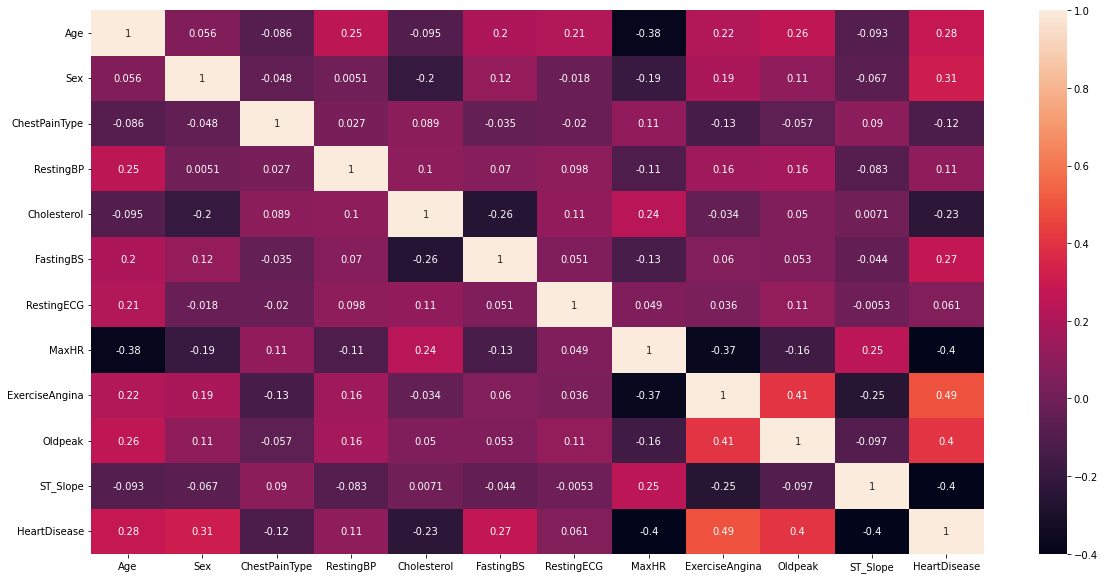

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(df_limpio.corr(), annot = True)

In [14]:
df_limpio.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.085635,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,-0.093424,0.282039
Sex,0.055750,1.000000,-0.047979,0.005133,-0.200092,0.120076,-0.018343,-0.189186,0.190664,0.105734,-0.066831,0.305445
ChestPainType,-0.085635,-0.047979,1.000000,0.026814,0.089145,-0.034611,-0.019840,0.111837,-0.134245,-0.057019,0.090097,-0.119143
RestingBP,0.254399,0.005133,0.026814,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,-0.083418,0.107589
Cholesterol,-0.095282,-0.200092,0.089145,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,0.007110,-0.232741
FastingBS,0.198039,0.120076,-0.034611,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,-0.043534,0.267291
RestingECG,0.213152,-0.018343,-0.019840,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,-0.005282,0.061011
MaxHR,-0.382045,-0.189186,0.111837,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,0.246927,-0.400421
ExerciseAngina,0.215793,0.190664,-0.134245,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,-0.253181,0.494282
Oldpeak,0.258612,0.105734,-0.057019,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,-0.097323,0.403951


* age *<=>* MaxHR **-0.38**
* MaxHR *<=>* HeartDisease **-0.40**
* ExerciseAngina *<=>* HeartDisease **0.49**
* ExerciseAngina *<=>* ST_Slope **-0.43**
* ExerciseAngina *<=>* Oldpeak **0.41**
* ExerciseAngina *<=>* MaxHr **-0.37**
* Oldpeak *<=>* HeartDisease **0.40**
* Oldpeak *<=>* ST_Slope **-0.50**
* ST_Slope *<=>* HeartDisease **-0.56**

## Varibles más correladas entre sí y con HeartDisease:
- ExerciseAngina
- Oldpeak
- ST_Slope
- MaxHR

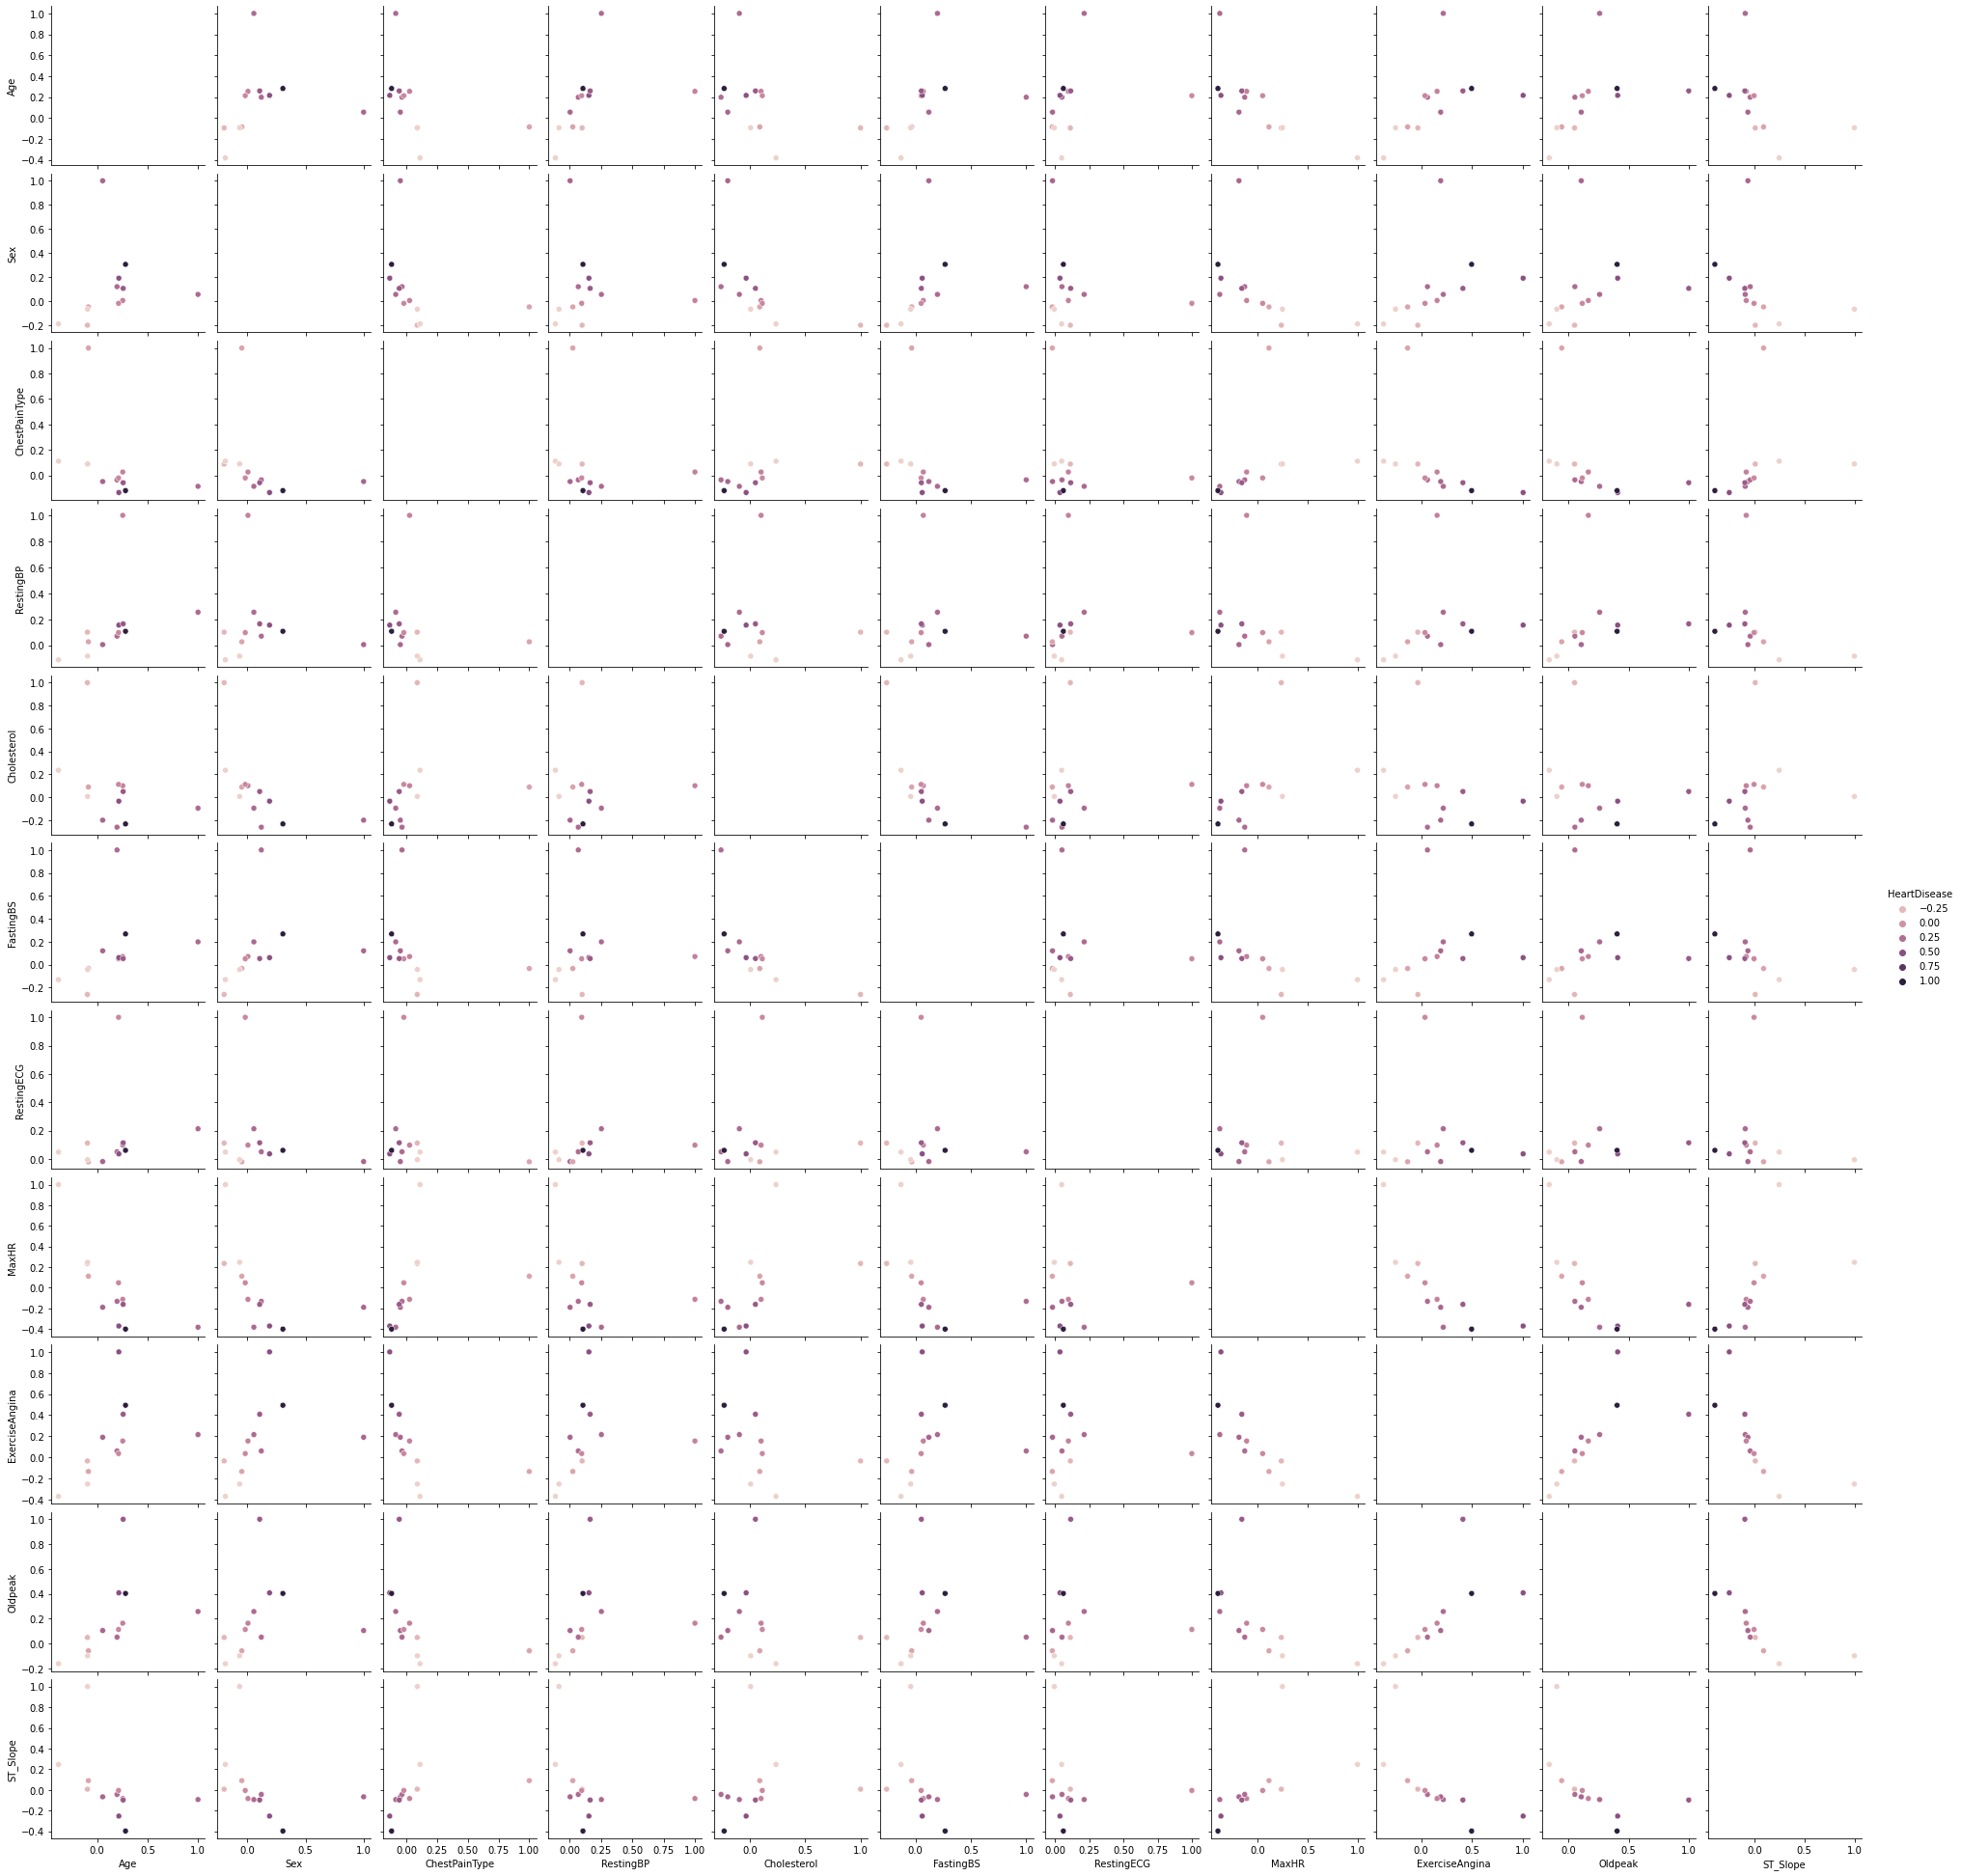

In [15]:
sns.pairplot(df_limpio.corr(),hue = "HeartDisease")

### Vemos que las personas a las que se les ha inducido una angina mediante el ejercicio son las que más problemas cardiovasculares tienen.

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 1.0)

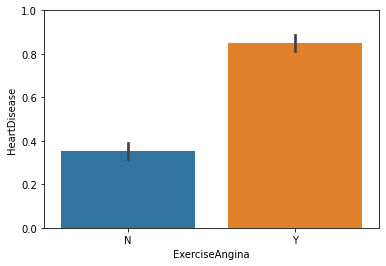

In [16]:
sns.barplot(df["ExerciseAngina"],df["HeartDisease"])
plt.ylim(0,1)

### Las personas que no padecen enfermedades cardiovasculares, en su gran mayoria, no han experimentado picos importantes en reposo. La mayor distribución se encuetra en 0.



### Por otro lado, los que si las padecen han experimentado picos superiores.

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-2.6, 6.2)

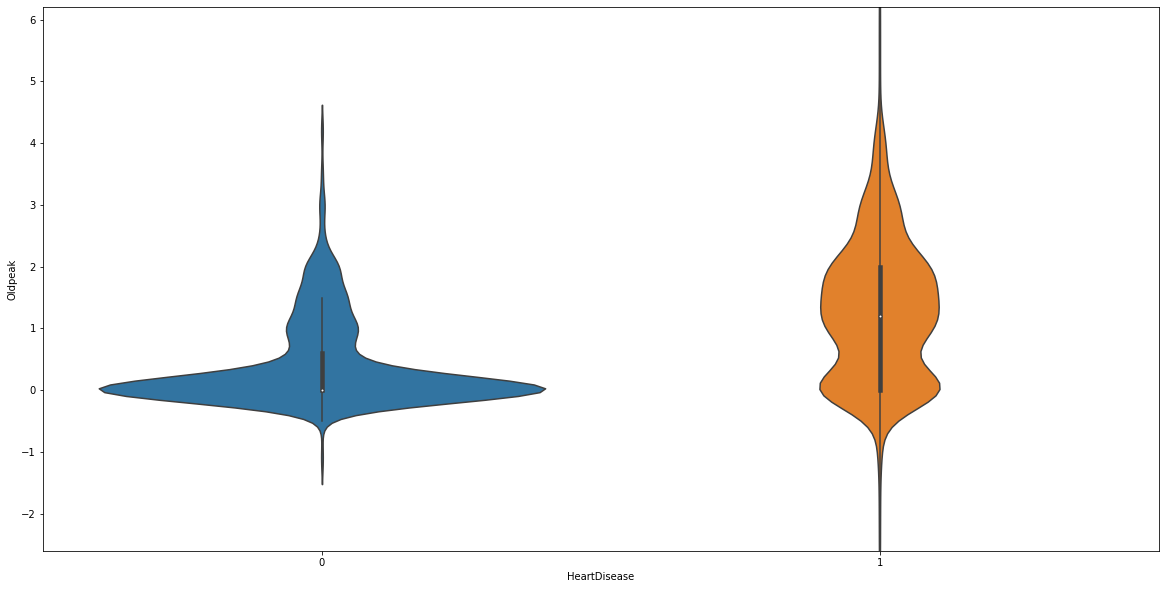

In [17]:
plt.figure(figsize = (20,10))
sns.violinplot(df["HeartDisease"],df["Oldpeak"]);
plt.ylim(-2.6,6.2)

In [18]:
df["Oldpeak"].unique().max()

6.2

In [19]:
df["Oldpeak"].unique().min()

-2.6

### Aquí observamos que las personas cuyos intervalos de tiempo entre latido y latido son más largos (Oldpeak), tienen una pendiente en el pico que tiende a bajar (ST_Slope Down)

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


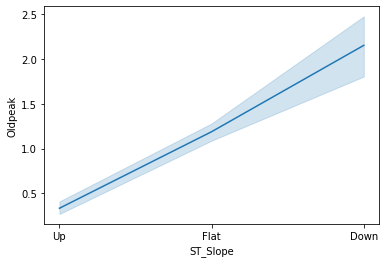

In [20]:
sns.lineplot(df["ST_Slope"],df["Oldpeak"]);

Text(0, 0.5, 'Densidad / Distribución')

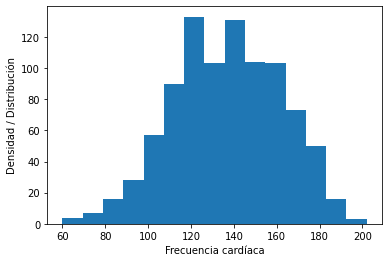

In [21]:
plt.hist(df["MaxHR"], bins=15, histtype = "barstacked")
plt.xlabel("Frecuencia cardíaca")
plt.ylabel("Densidad / Distribución")

### De media, las personas con picos en la frecuencia cardíaca más bajos son las que han experimentado más problemas del corazón.

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


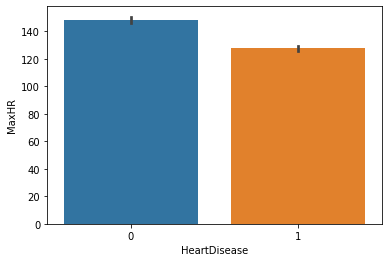

In [22]:
sns.barplot(df["HeartDisease"],df["MaxHR"]);

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


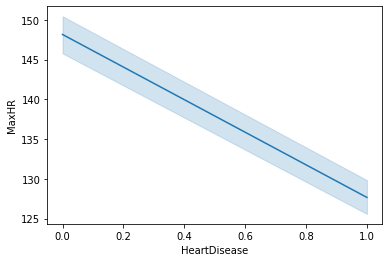

In [23]:
sns.lineplot(df["HeartDisease"],df["MaxHR"]);

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


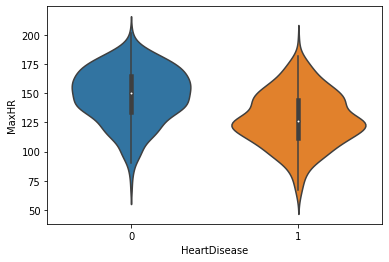

In [24]:
sns.violinplot(df["HeartDisease"],df["MaxHR"]);

In [27]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [26]:
df_limpio

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1.0,3.0,140.0,289.0,0.0,1.0,172.0,0.0,0.0,2.0,0.0
1,49.0,0.0,1.0,160.0,180.0,0.0,1.0,156.0,0.0,1.0,1.0,1.0
2,37.0,1.0,3.0,130.0,283.0,0.0,2.0,98.0,0.0,0.0,2.0,0.0
3,48.0,0.0,2.0,138.0,214.0,0.0,1.0,108.0,1.0,1.5,1.0,1.0
4,54.0,1.0,1.0,150.0,195.0,0.0,1.0,122.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1.0,4.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,1.0
914,68.0,1.0,2.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,1.0
915,57.0,1.0,2.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0
916,57.0,0.0,3.0,130.0,236.0,0.0,3.0,174.0,0.0,0.0,1.0,1.0
